# Example 2.12

Let us now implement **Example 2.12** of the lecture notes.

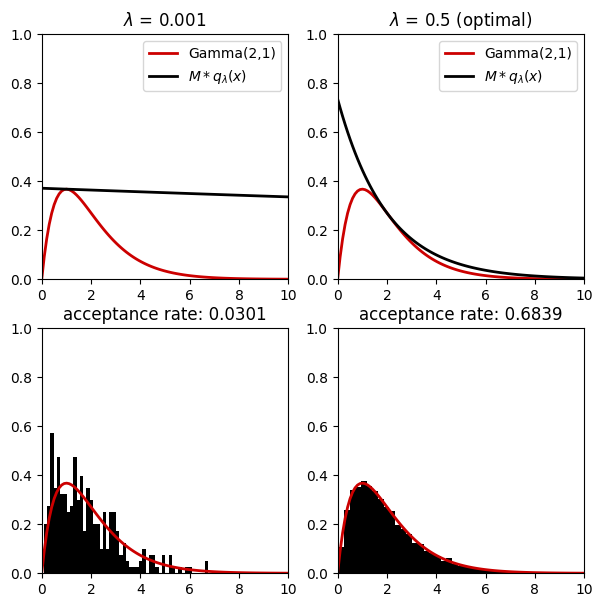

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling from Gamma(2,1) using rejection sampling

# Gamma(alpha, 1) density
def gamma_density(x, alpha):
    return x**(alpha - 1) * np.exp(-x) / np.math.factorial(alpha - 1)

def exponential_density(x, lam):
    return lam * np.exp(-lam * x)

def M(alpha, lam):
    return ((alpha - 1)/(1 - lam))**(alpha - 1) * np.exp(-(alpha - 1)) / (lam * np.math.factorial(alpha-1))

def gamma_rejection_sampling(alpha, lam, n):
    x = np.array([])
    acc = 0
    for i in range(n):
        x_prime = np.random.exponential(1/lam)
        u = np.random.uniform(0, 1)
        if u < gamma_density(x_prime, alpha) / (M(alpha, lam) * exponential_density(x_prime, lam)):
            x = np.append(x, x_prime)
            acc += 1

    return x, acc/n

alpha = 2
lam_1 = 0.01
n = 10000

x_lam_1, acc_rate_1 = gamma_rejection_sampling(alpha, lam_1, n)

alpha = 2
lam_2 = 1/alpha

x_lam_2, acc_rate_2 = gamma_rejection_sampling(alpha, lam_2, n)

xx = np.linspace(0, 10, 100)
fig, axs = plt.subplots(2, 2, figsize=(7, 7), width_ratios=[1, 1], height_ratios=[1, 1])
axs[0, 0].plot(xx, gamma_density(xx, alpha), color=[0.8, 0, 0], linewidth=2)
axs[0, 0].plot(xx, M(alpha, lam_1) * exponential_density(xx, lam_1), color='k', linewidth=2)
axs[0, 0].set_xlim(0, 10)
axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_title('$\lambda$ = 0.001')
axs[0, 0].legend(['Gamma(2,1)', '$M * q_\lambda(x)$'])
axs[0, 1].plot(xx, gamma_density(xx, alpha), color=[0.8, 0, 0], linewidth=2)
axs[0, 1].plot(xx, M(alpha, lam_2) * exponential_density(xx, lam_2), color='k', linewidth=2)
axs[0, 1].legend(['Gamma(2,1)', '$M * q_\lambda(x)$'])
axs[0, 1].set_xlim(0, 10)
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_title('$\lambda$ = 0.5 (optimal)')
axs[1, 0].plot(xx, gamma_density(xx, alpha), color=[0.8, 0, 0], linewidth=2)
axs[1, 0].hist(x_lam_1, bins=50, density=True, color='k', alpha=1)
axs[1, 0].set_xlim(0, 10)
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_title('acceptance rate: ' + str(acc_rate_1))
axs[1, 1].plot(xx, gamma_density(xx, alpha), color=[0.8, 0, 0], linewidth=2)
axs[1, 1].hist(x_lam_2, bins=50, density=True, color='k', alpha=1)
axs[1, 1].set_xlim(0, 10)
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_title('acceptance rate: ' + str(acc_rate_2))
plt.show()